### 📚 Essential Libraries for Machine Learning 🚀


In [ ]:

# Data Manipulation & Analysis 📊
import pandas as pd # Used for creating and manipulating dataframes
import seaborn as sns # For enhanced data visualization
import matplotlib.pyplot as plt # Core library for plotting

# Machine Learning - Model Building & Evaluation 🤖
from sklearn.model_selection import train_test_split # To split data into training and testing sets
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors classification algorithm
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix # Metrics for model evaluation

# Data Preprocessing & Cleaning 🧹
from sklearn.preprocessing import StandardScaler,LabelEncoder # For feature scaling and encoding categorical variables
from sklearn.impute import KNNImputer # For imputing missing values using KNN

### 📂 Loading the Dataset 📥


In [ ]:
df = pd.read_csv("fake_bills_corrected.csv") # Loading the dataset into a pandas DataFrame

### 🏷️ Encoding Categorical Variables 🔄


In [ ]:

le = LabelEncoder() # Initializing the LabelEncoder
df["is_genuine"] = le.fit_transform(df["is_genuine"]) # Converting 'is_genuine' column from categorical to numerical (0s and 1s)

### 🎯 Separating Features (X) and Target (y) Variables 🏹


In [319]:
X = df.drop("is_genuine", axis=1) # Features: Dropping the 'is_genuine' column from the DataFrame
y = df["is_genuine"] # Target: Selecting the 'is_genuine' column as the target variable


### ✂️ Splitting Data into Training and Testing Sets 🧪


In [320]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# Splitting the data: 80% for training (X_train, y_train) and 20% for testing (X_test, y_test)
# 'random_state=42' ensures reproducibility of the split

### 🔍 Handling Missing Values with KNNImputer 🩹


In [ ]:

kn = KNNImputer() # Initializing the KNNImputer
X_train_kn = kn.fit_transform(X_train) # Imputing missing values in the training set
X_test_kn = kn.transform(X_test) # Imputing missing values in the testing set using the fitted imputer

### 🤖 Building and Training the K-Nearest Neighbors Model 🚀


In [321]:

kn = KNeighborsClassifier() # Initializing the K-Nearest Neighbors classifier
model = kn.fit(X_train_kn, y_train) # Training the KNN model using the imputed training data
y_pred = model.predict(X_test_kn) # Making predictions on the imputed test set

### 📊 Model Evaluation: Performance Metrics 📈


In [322]:

print(classification_report(y_pred, y_test)) # Prints a detailed classification report including precision, recall, f1-score, and support
print(accuracy_score(y_pred, y_test)) # Prints the overall accuracy of the model

              precision    recall  f1-score   support

       False       0.96      1.00      0.98       106
        True       1.00      0.98      0.99       194

    accuracy                           0.99       300
   macro avg       0.98      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

0.9866666666666667


### 📊 Visualizing Model Performance: Confusion Matrix 📈


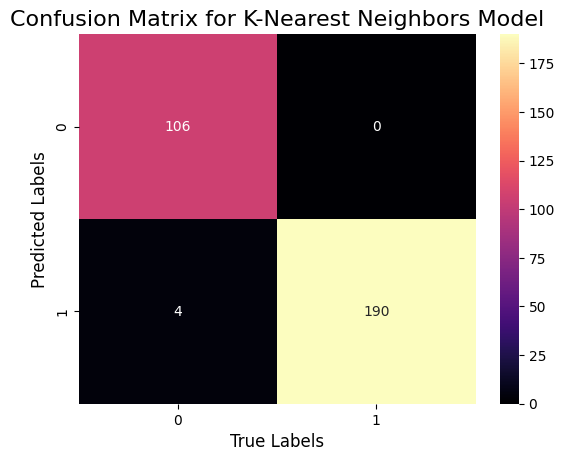

In [324]:

plt.Figure(figsize=(12,8)) # Setting up a figure with a specified size for the plot
sns.heatmap(confusion_matrix(y_pred,y_test), annot=True, fmt='d', cmap='magma') 

# Adding labels and title for better interpretation 🏷️
plt.title('Confusion Matrix for K-Nearest Neighbors Model', fontsize=16) # Title of the plot
plt.xlabel('True Labels', fontsize=12) # Label for the X-axis
plt.ylabel('Predicted Labels', fontsize=12) # Label for the Y-axis

plt.show() # Display the plot (it's good practice to include this when creating plots)